In [2]:
%matplotlib inline

import matplotlib as mp
import matplotlib.pylab as plt
import numpy as np
import numpy.linalg as ln
import scipy as sp
import pandas as pd
#libreria sismica
from seismic_source import SeismicEvent, Source

descomposición en componentes principales de un evento sísmico



In [70]:
e = SeismicEvent.evento("./data-sets/2011_apr_10_07_52")
ss = e.seismograms[0]
u = np.array([ss.X_coord, ss.Y_coord, ss.Z_coord])

importado!


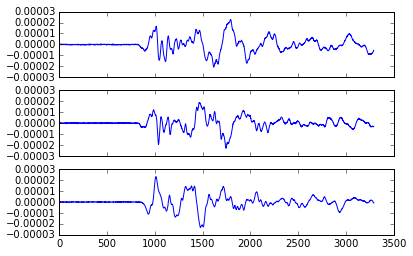

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(ss.data[:,2])
ax2.plot(ss.data[:,3])
ax3.plot(ss.data[:,4])

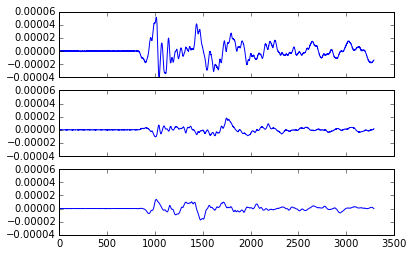

In [50]:
#descomposicion ortgonal
covariance_matrix = cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

In [49]:
ss.data[:, 2:5]

array([[  1.01400000e-08,   1.46200000e-08,   2.18000000e-08],
       [  1.80100000e-08,   4.00200000e-08,   1.18400000e-07],
       [ -2.48100000e-08,  -3.09400000e-08,   2.19500000e-07],
       ..., 
       [ -5.95900000e-06,  -3.13900000e-06,  -4.76600000e-07],
       [ -5.58200000e-06,  -3.06300000e-06,  -6.28100000e-07],
       [ -5.41500000e-06,  -3.08100000e-06,  -9.78000000e-07]])

In [5]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

importado!


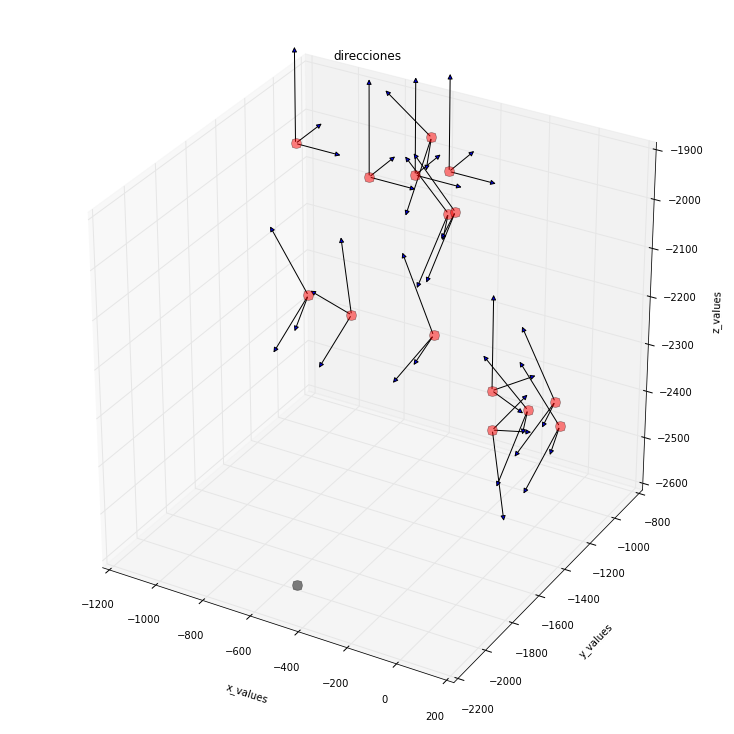

In [107]:
%matplotlib inline

import matplotlib as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
import numpy as np
import numpy.linalg as ln
import scipy as sp
import pandas as pd
#libreria sismica
from seismic_source import SeismicEvent, Source

# Dibujar vectores
e = SeismicEvent.evento("./data-sets/2011_apr_10_07_52")

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

#estimacion del sismo
plt.plot([e.LocX], [e.LocY], [e.LocZ], 'o', markersize=10, color='black', alpha=0.5)

for i, ss in enumerate(e.seismograms):

    #descomposicion ortgonal de la señal
    covariance_matrix = np.cov(np.cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
    eig_val, eig_vec = ln.eig(covariance_matrix)

    #ubicacion del sensor
    X_coord, Y_coord, Z_coord  = (ss.X_coord, ss.Y_coord, ss.Z_coord)
 
    #graficar las direcciones
    plt.plot([X_coord], [Y_coord], [Z_coord], 'o', markersize=10, color='red', alpha=0.5, )
    n = 200
    v0, v1, v2 = eig_vec
    
    a = Arrow3D([X_coord, X_coord + n*v0[0]], 
                [Y_coord, Y_coord + n*v0[1]], 
                [Z_coord, Z_coord + n*v0[2]], mutation_scale=10, arrowstyle="-|>")
    ax.add_artist(a)        
    
    
    a = Arrow3D([X_coord, X_coord + n*v1[0]], 
                [Y_coord, Y_coord + n*v1[1]], 
                [Z_coord, Z_coord + n*v1[2]], mutation_scale=10, arrowstyle="-|>")
    ax.add_artist(a)            
    
    
    
    a = Arrow3D([X_coord, X_coord + n*v2[0]], 
                [Y_coord, Y_coord + n*v2[1]], 
                [Z_coord, Z_coord + n*v2[2]], mutation_scale=10, arrowstyle="-|>")
    ax.add_artist(a)
    
    ax.set_xlabel('x_values')
    ax.set_ylabel('y_values')
    ax.set_zlabel('z_values')
    plt.draw()
    
plt.title('direcciones')

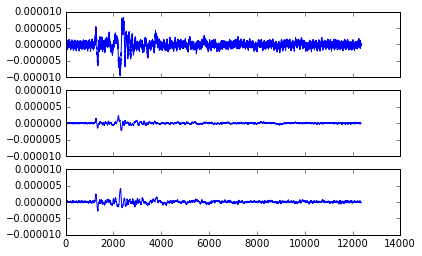

In [103]:
#descomposicion ortgonal

ss = e.seismograms[14]
covariance_matrix = np.cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = ln.eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = np.dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

Resultado principal
==
Mediante este método la estimación del epicentro sísmico de obtiene

In [22]:
X_coord

-663.190002

In [23]:
v[0]

-0.74261198649498206